In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import random 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/BIG%20MART%20SALES%20PREDICTION%20data/Train.csv'
df = pd.read_csv(url)
#url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/BIG%20MART%20SALES%20PREDICTION%20data/Test.csv'
#X_test = pd.read_csv(url)

#https://www.kaggle.com/devashish0507/big-mart-sales-prediction?select=Train.csv

**ข้อ 2**

In [ ]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2234,FDL43,10.100,Low Fat,0.027217,Meat,76.0670,OUT017,2007,NaN,Tier 2,Supermarket Type1,1454.7730
3830,FDW25,5.175,LF,0.037368,Canned,86.9224,OUT013,1987,High,Tier 3,Supermarket Type1,255.6672
4210,NCC30,16.600,Low Fat,0.027556,Household,176.6344,OUT013,1987,High,Tier 3,Supermarket Type1,1962.7784
6542,FDU48,18.850,Low Fat,0.055672,Baking Goods,133.3284,OUT017,2007,NaN,Tier 2,Supermarket Type1,263.6568
2716,FDP34,12.850,Low Fat,0.137228,Snack Foods,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1,4224.5010
491,FDO11,NaN,Regular,0.030118,Breads,248.8092,OUT027,1985,Medium,Tier 3,Supermarket Type3,3486.1288
3902,FDT34,9.300,Low Fat,0.175336,Snack Foods,107.0964,OUT017,2007,NaN,Tier 2,Supermarket Type1,1472.7496
6331,FDA38,5.440,Low Fat,0.025459,Dairy,241.2538,OUT013,1987,High,Tier 3,Supermarket Type1,3124.5994
135,NCO26,7.235,Low Fat,0.076856,Household,116.0492,OUT046,1997,Small,Tier 1,Supermarket Type1,1969.4364
3480,FDY47,8.600,reg,0.054706,Breads,128.9310,OUT018,2009,Medium,Tier 3,Supermarket Type2,1428.1410


In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


**ข้อ 3**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**ข้อ 8**

In [ ]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


**ข้อ 7**

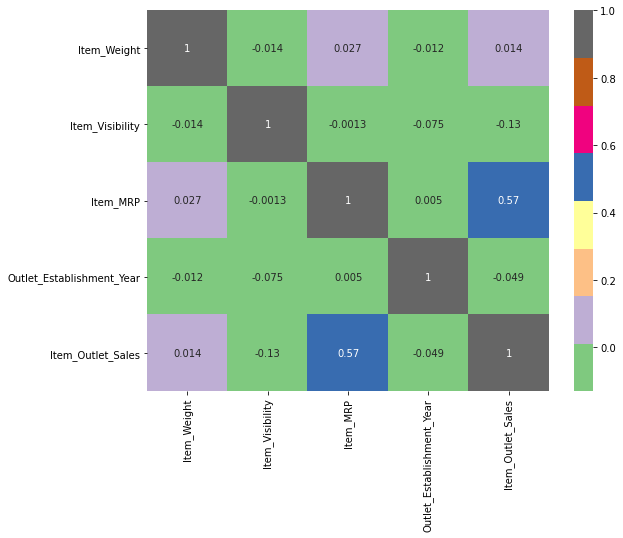

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent',annot= True)

**ข้อ 4**

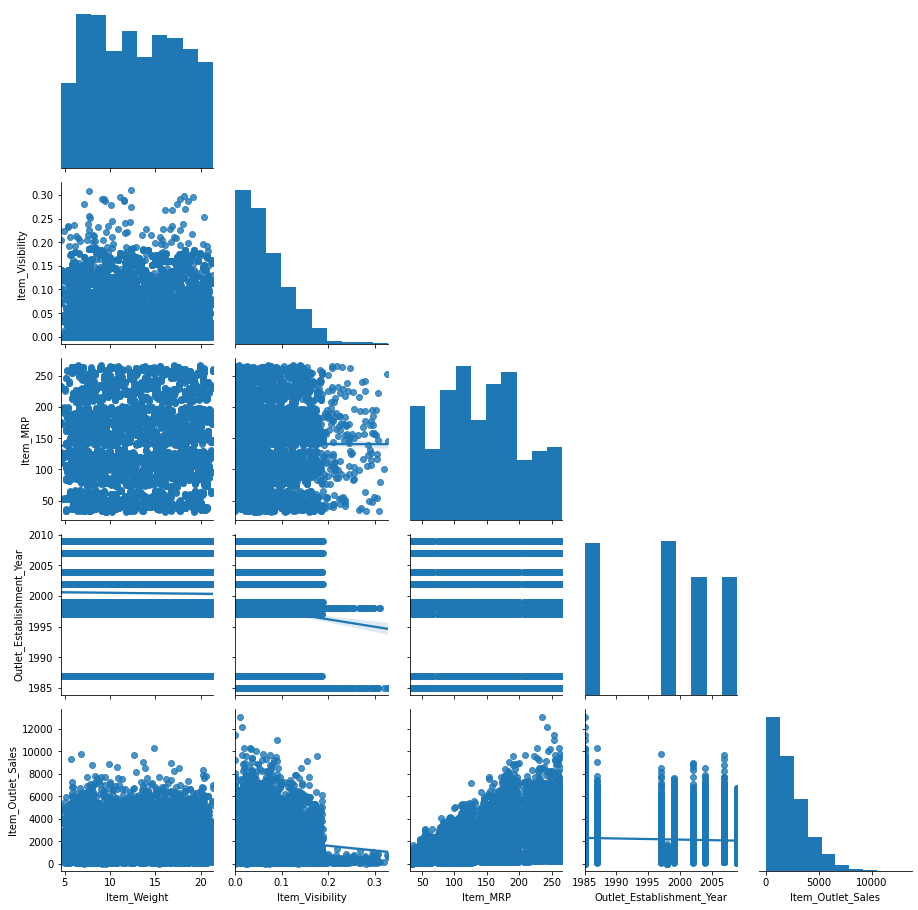

In [ ]:
sns.pairplot(df,kind='reg',corner=True)

**ข้อ 5 ,6 ,9 ,10**

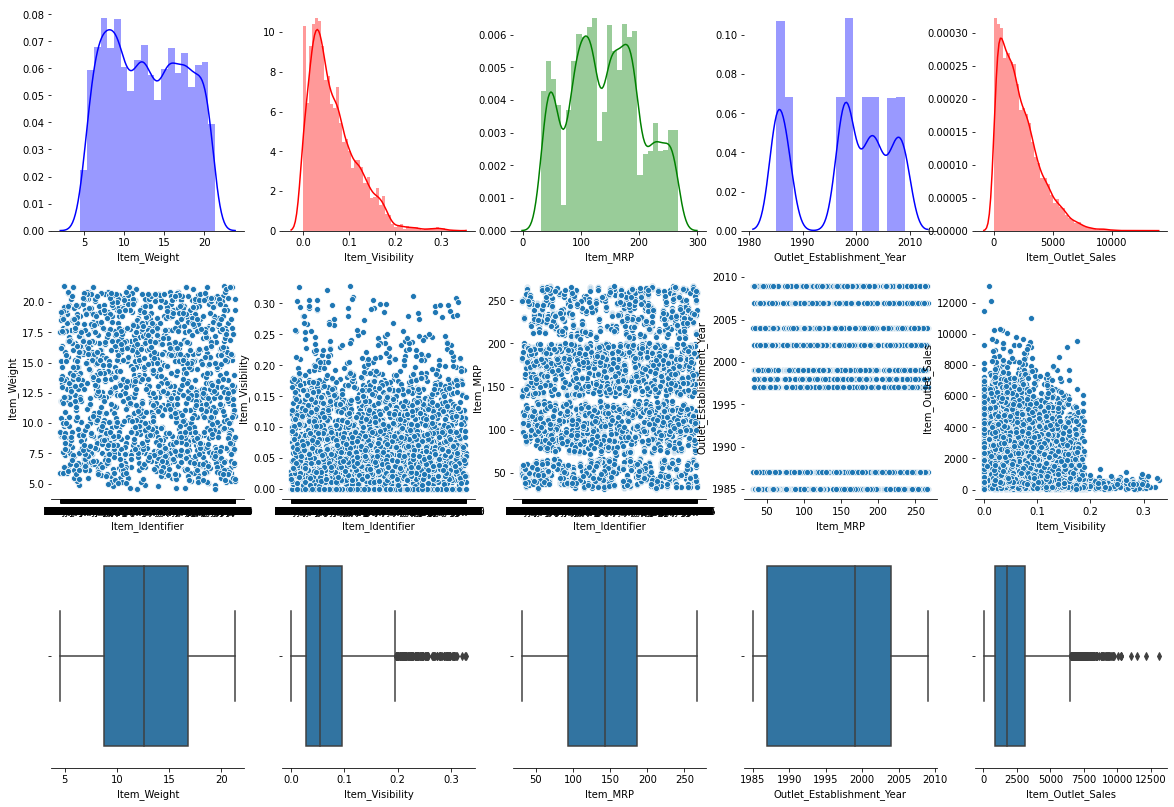

In [ ]:
f, axes = plt.subplots(3, 5, figsize=(20, 14), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,1], kde=True, color="b", ax=axes[0,0])
sns.distplot(df.iloc[:,3], kde=True, color="r", ax=axes[0,1])
sns.distplot(df.iloc[:,5], kde=True, color="g", ax=axes[0,2])
sns.distplot(df.iloc[:,7], kde=True, color="b", ax=axes[0,3])
sns.distplot(df.iloc[:,11], kde=True, color="r", ax=axes[0,4])

sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],data=df, ax=axes[1, 0])
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,3],data=df, ax=axes[1, 1])
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,5],data=df, ax=axes[1, 2])
sns.scatterplot(x=df.iloc[:,5],y=df.iloc[:,7],data=df, ax=axes[1, 3])
sns.scatterplot(x=df.iloc[:,3],y=df.iloc[:,11],data=df, ax=axes[1, 4])

sns.boxplot(df.iloc[:,1],ax=axes[2, 0])
sns.boxplot(df.iloc[:,3],ax=axes[2, 1])
sns.boxplot(df.iloc[:,5],ax=axes[2, 2])
sns.boxplot(df.iloc[:,7],ax=axes[2, 3])
sns.boxplot(df.iloc[:,11],ax=axes[2, 4])

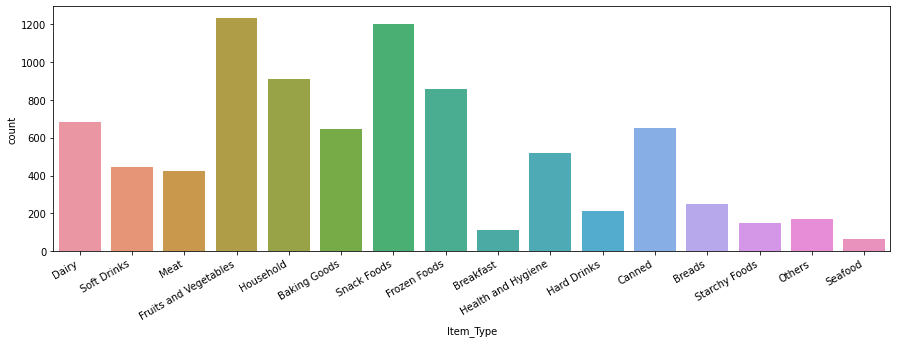

In [ ]:
fig = plt.figure(figsize=(15,5)) #6
sns.countplot(df.iloc[:,4])
fig.autofmt_xdate()

**ข้อ 28**

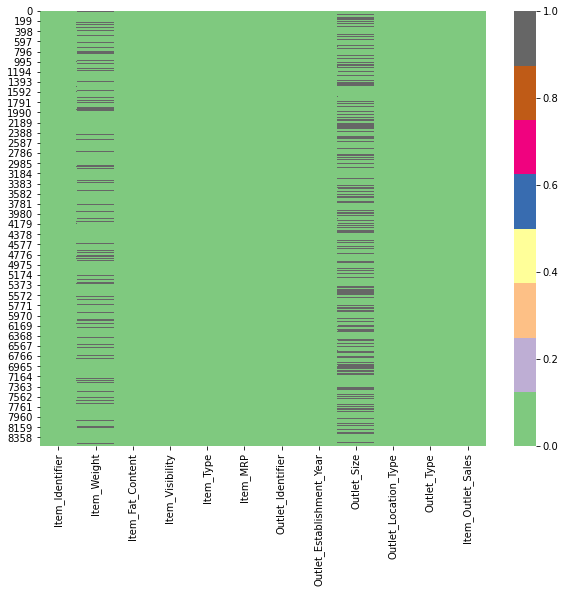

In [ ]:
fig = plt.figure(figsize=(10,8)) #28
sns.heatmap(df.isnull(), cbar=True, cmap='Accent')

**ข้อ 11**

In [ ]:
df.iloc[:,2].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.iloc[:,2] = df.iloc[:,2].replace(['Low Fat','Regular','reg','low fat'],['LF','REG','REG','LF'])

In [ ]:
df.iloc[:,2].value_counts()

LF     5517
REG    3006
Name: Item_Fat_Content, dtype: int64

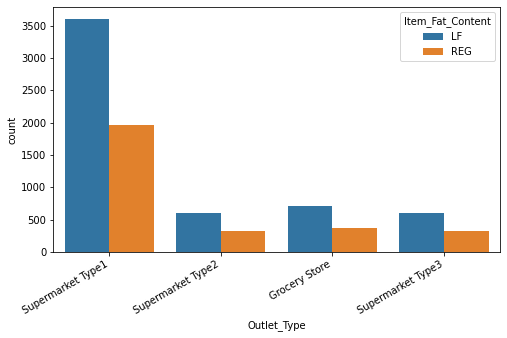

In [ ]:
fig = plt.figure(figsize=(8,5)) #12
sns.countplot(df.iloc[:,10],hue=df.iloc[:,2])
fig.autofmt_xdate()

**ข้อ 13**

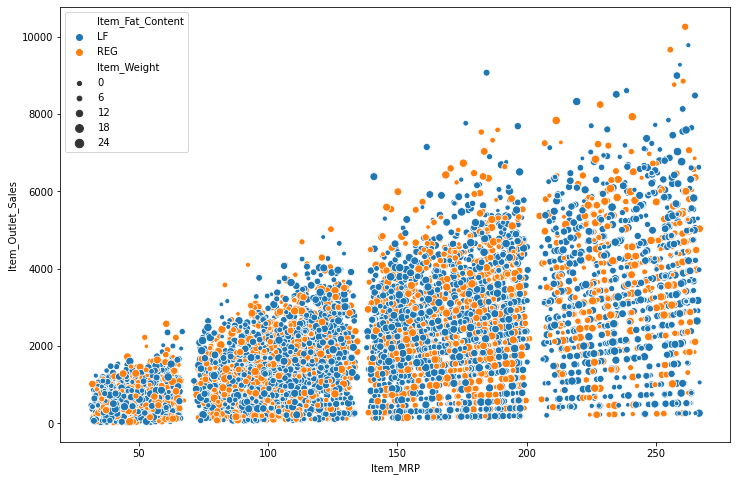

In [ ]:
fig = plt.figure(figsize=(12,8)) #13
sns.scatterplot(x=df.iloc[:,5],y=df.iloc[:,11],data=df,hue=df.iloc[:,2],
                size = df.iloc[:,1])

** ข้อ 14 ถึง 21**

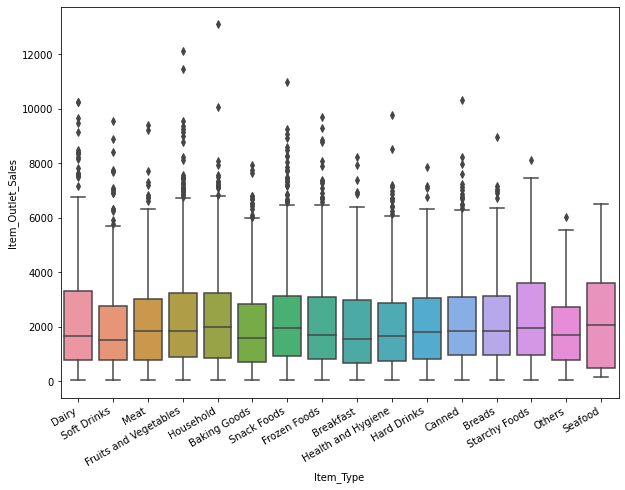

In [ ]:
fig = plt.figure(figsize=(10,8)) #14
sns.boxplot(x=df.iloc[:,4],y=df.iloc[:,11])
fig.autofmt_xdate()

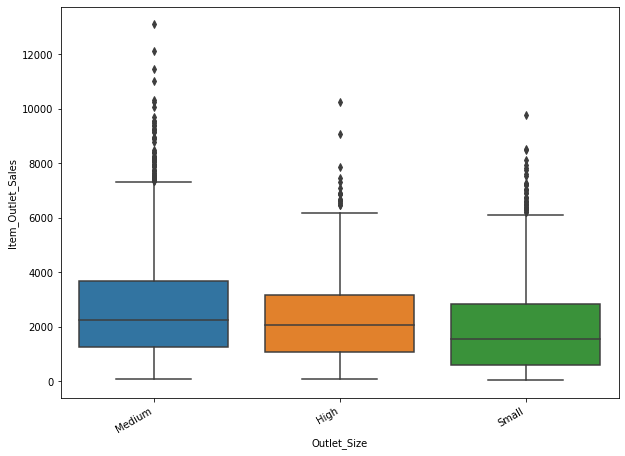

In [ ]:
fig = plt.figure(figsize=(10,8)) #15
sns.boxplot(x=df.iloc[:,8],y=df.iloc[:,11])
fig.autofmt_xdate()

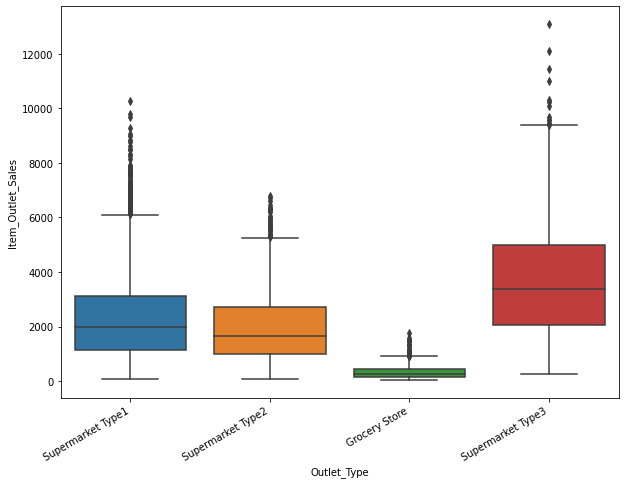

In [ ]:
fig = plt.figure(figsize=(10,8)) #16
sns.boxplot(x=df.iloc[:,10],y=df.iloc[:,11])
fig.autofmt_xdate()

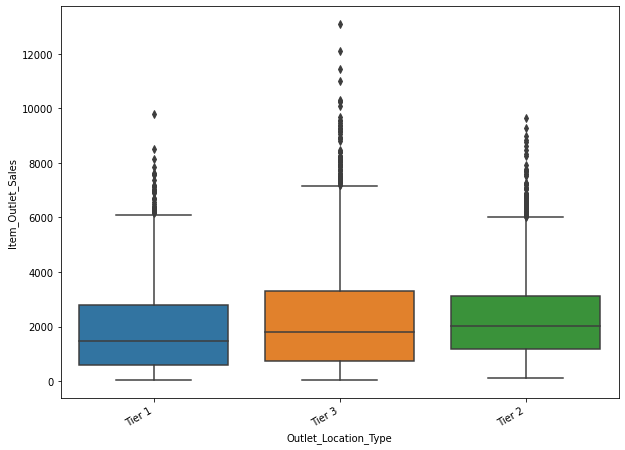

In [ ]:
fig = plt.figure(figsize=(10,8)) #17
sns.boxplot(x=df.iloc[:,9],y=df.iloc[:,11])
fig.autofmt_xdate()

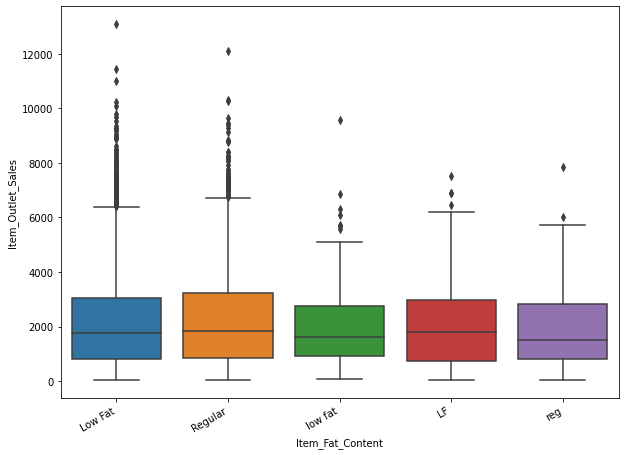

In [ ]:
fig = plt.figure(figsize=(10,8)) #18
sns.boxplot(x=df.iloc[:,2],y=df.iloc[:,11])
fig.autofmt_xdate()

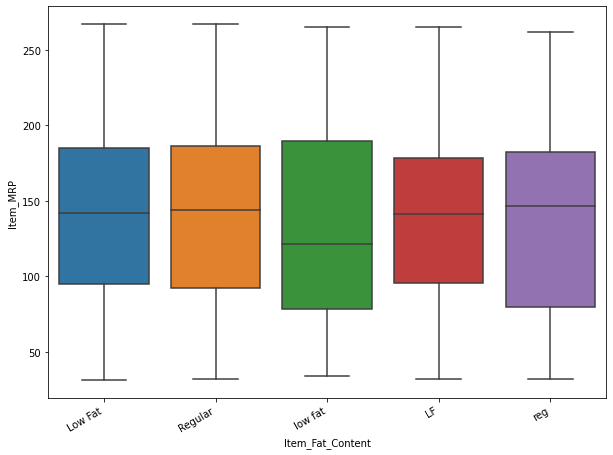

In [ ]:
fig = plt.figure(figsize=(10,8)) #19
sns.boxplot(x=df.iloc[:,2],y=df.iloc[:,5])
fig.autofmt_xdate()

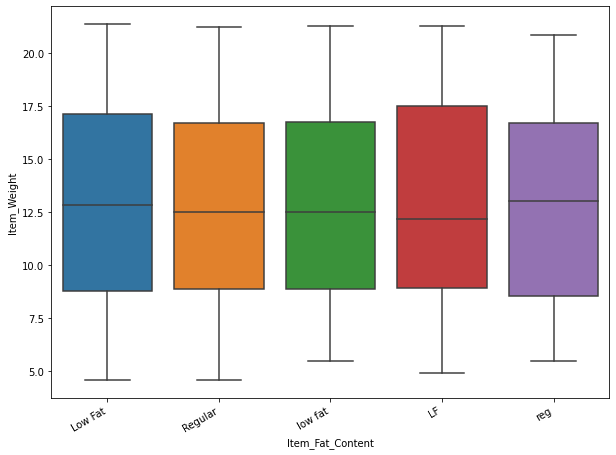

In [ ]:
fig = plt.figure(figsize=(10,8)) #20
sns.boxplot(x=df.iloc[:,2],y=df.iloc[:,1])
fig.autofmt_xdate()

In [ ]:
fig = plt.figure(figsize=(10,8)) #21
px.pie(df,values=df.iloc[:,11],names=df.iloc[:,4])

<Figure size 720x576 with 0 Axes>

**ข้อ 22**

In [ ]:
df.groupby(df.iloc[:,0]).mean() #22

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


**ข้อ 23** 

In [ ]:
df2 = df.groupby(df.iloc[:,0]).mean().head(10) #23

fig = plt.figure(figsize=(8,6)) 
px.scatter(df2,x=df2.index,y=df2.iloc[:,4],size=df2.iloc[:,0],color=df2.iloc[:,1])

<Figure size 576x432 with 0 Axes>

**ข้อ 24**

In [ ]:
df[df.iloc[:,10]=='Grocery Store'].sample(3) #24

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4225,FDL13,13.85,REG,0.094266,Breakfast,233.9300,OUT010,1998,NaN,Tier 3,Grocery Store,233.0300
2766,DRD25,NaN,LF,0.138270,Soft Drinks,111.6860,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
255,FDQ04,NaN,LF,0.148393,Frozen Foods,41.5796,OUT019,1985,Small,Tier 1,Grocery Store,41.2796


In [ ]:
df.groupby(df.iloc[:,10]).get_group('Grocery Store').sample(3) #24

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
531,NCM55,15.6,LF,0.111686,Others,184.7924,OUT010,1998,NaN,Tier 3,Grocery Store,370.1848
490,NCT41,NaN,LF,0.098032,Health and Hygiene,151.3024,OUT019,1985,Small,Tier 1,Grocery Store,151.8024
63,FDY40,NaN,REG,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076


In [ ]:
df[(df.iloc[:,4]=='Soft Drinks') & (df.iloc[:,8]=='Small')].sample(5) #25

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
108,DRE60,NaN,LF,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
6256,DRE25,15.35,LF,0.073283,Soft Drinks,91.8120,OUT046,1997,Small,Tier 1,Supermarket Type1,1771.0280
8047,DRE37,13.50,LF,0.000000,Soft Drinks,189.1872,OUT035,2004,Small,Tier 2,Supermarket Type1,1890.8720
6970,DRH36,16.20,LF,0.033380,Soft Drinks,74.0696,OUT046,1997,Small,Tier 1,Supermarket Type1,1416.8224
544,DRG01,14.80,LF,0.044870,Soft Drinks,76.4670,OUT035,2004,Small,Tier 2,Supermarket Type1,1531.3400


**ข้อ 27**

In [ ]:
df.iloc[:,7] = df.iloc[:,7].astype('category') #27
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                7060 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   category
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(7)
memory usage: 741.3+ KB


**ข้อ 29**

In [ ]:
df.iloc[:,1].fillna(value=df.iloc[:,1].mean(),inplace = True) #29
df.iloc[:,8].fillna(value= 'Medium' ,inplace = True)

In [ ]:
df.drop(df.columns[[0,6,7]],axis=1,inplace=True) #30

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


**ข้อ 31**

In [ ]:
df.iloc[:,8].max(),df.iloc[:,8].min() #31

(13086.9648, 33.29)

## 2.3 get one hot df

In [ ]:
df_real = pd.get_dummies(df,drop_first=True)

In [ ]:
df_real.sample(3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,...,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
6355,6.890,0.136428,193.9820,1737.7380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1014,NaN,0.079243,65.8826,1614.5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2984,7.825,0.150248,155.2288,1257.0304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


**ข้อ 32**

In [ ]:
label_col = 3 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code #32

X = df_real.iloc[:,[2]]
y = df_real.iloc[:,label_col]

X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

**ข้อ 33**

In [ ]:
lm = LinearRegression() #33

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ข้อ 34**

In [ ]:
lm.intercept_,lm.coef_ #34

(-19.00358982934631, array([15.58031428]))

In [ ]:
y_predict = lm.predict(X_test)

**ข้อ 35**

In [ ]:
metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict)),metrics.r2_score(y_test,y_predict) #35

(1048.997064462256, 2036040.671558162, 1426.8989703402838, 0.3098918604456873)

**ข้อ 36**

In [ ]:
fig = plt.figure(figsize=(8,6)) 


In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

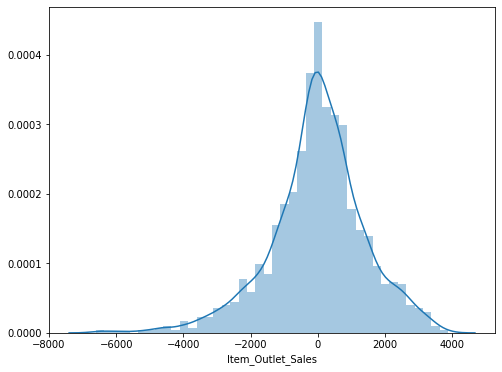

In [ ]:
fig = plt.figure(figsize=(8,6)) #36
sns.distplot(y_predict-y_test) 

**ข้อ 38**

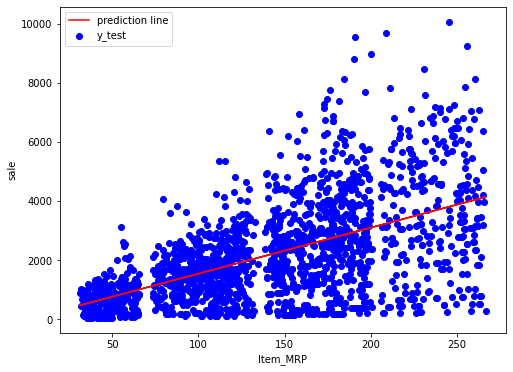

In [ ]:
fig = plt.figure(figsize=(8,6)) #37
plt.plot(X_test,y_predict,color = 'red',label = 'prediction line')
plt.scatter(X_test,y_test,color = 'blue',label = 'y_test')
plt.xlabel('Item_MRP')
plt.ylabel('sale')
plt.legend()

**ข้อ 38 และ 39**

In [ ]:
label_col = 3 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code #32

X = df_real.iloc[:,[2]]
y = df_real.iloc[:,[label_col]] #39

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)

In [ ]:
pair = dict(zip(X_test.flatten(),y_test.flatten()))
pair = dict(sorted(pair.items()))

In [ ]:
X_test = pd.DataFrame(list(pair.keys()))
y_test = pd.DataFrame(list(pair.values()))

In [ ]:
reg = SVR(kernel='rbf') #38

reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_predict_svr = reg.predict(X_test)

In [ ]:
y_predict_svr

array([ 0.33811137,  0.99948845,  0.41690613, ..., -0.26790567,
        0.16630512,  0.45109342])

In [ ]:
y_predict_svr = sc_y.inverse_transform(y_predict_svr)
y_test = sc_y.inverse_transform(y_test)

**ข้อ 40**

In [ ]:
metrics.mean_absolute_error(y_test,y_predict_svr),metrics.mean_squared_error(y_test,y_predict_svr),np.sqrt(metrics.mean_squared_error(y_test,y_predict_svr)),metrics.r2_score(y_test,y_predict_svr) #40

(1044.1490800544318,
 2034649.9055171392,
 1426.411548437946,
 0.31653727573770807)

**ข้อ 41**

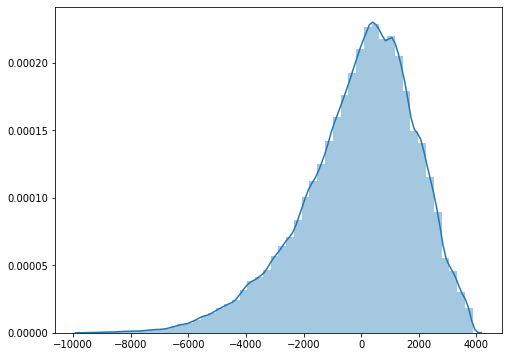

In [ ]:
fig = plt.figure(figsize=(8,6)) #41
sns.distplot(y_predict_svr-y_test) 

**ข้อ 42**

In [ ]:
X_test = sc_X.inverse_transform(X_test)

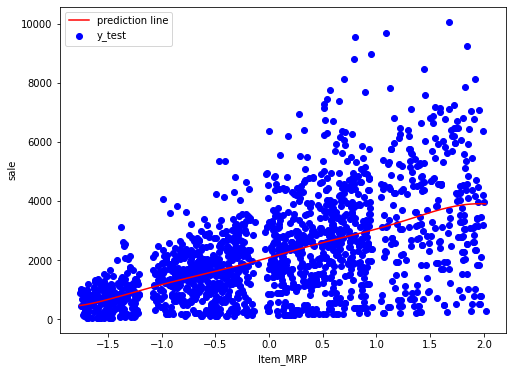

In [ ]:
fig = plt.figure(figsize=(8,6)) #42
plt.plot(X_test,y_predict_svr,color = 'red',label = 'prediction line')
plt.scatter(X_test,y_test,color = 'blue',label = 'y_test')
plt.xlabel('Item_MRP')
plt.ylabel('sale')
plt.legend()